# Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

## Read csv files containing extracted features from flower images

In [2]:
roses = pd.read_csv('rose_features.csv')
chrysanthemums = pd.read_csv('chrysanthemum_features.csv')
butterfly_pea = pd.read_csv('butterflypea_features.csv')

### Thresholding Function

In [3]:
def step_func(a):
    if a >= 0:
        return 1
    else:
        return -1

## Perceptron Algorithm

In [4]:
def perceptron(weight,learning_rate,d,sample):
    features = np.array([1,sample['b'],sample['eccentricity']])
    
    a = np.sum(features*weight)
    z = step_func(a)
    
    checker = d-z
    delta_w = learning_rate*checker*features
    weight += delta_w
    
    return checker,weight

## Apply Perceptron Algorithm to All Samples

In [5]:
def iterations(class1,class2,learning_rate,error_threshold):
    weights = np.random.random(3)
    d1 = 1 #class 1
    d2 = -1 #class 2

    while True:
        error_sum = 0

        for i in range(len(class1)):
            sample = class1.iloc[i]
            checker,weights = perceptron(weights,learning_rate,d1,sample)
            error_sum += checker**2

        for j in range(len(class2)):
            sample = class2.iloc[j]
            checker,weights = perceptron(weights,learning_rate,d2,sample)
            error_sum += checker**2

        if error_sum < error_threshold:
                break
    
    return weights

## Equation of line obtained after applying Perceptron Algorithm to features

In [6]:
def line_equation(class1,class2,learning_rate,error_threshold):
    weights = iterations(class1,class2,learning_rate,error_threshold)
    A = weights[1]
    B = weights[2]
    C = -weights[0]

    m = -A/B
    b = C/B
    
#     print(A,B,C)
    
    return m,b

## Get equation of line that separates roses from buterfly peas

In [10]:
m1,b1 = line_equation(roses,butterfly_pea,0.01,0.01)

## Plot eccentricity vs b

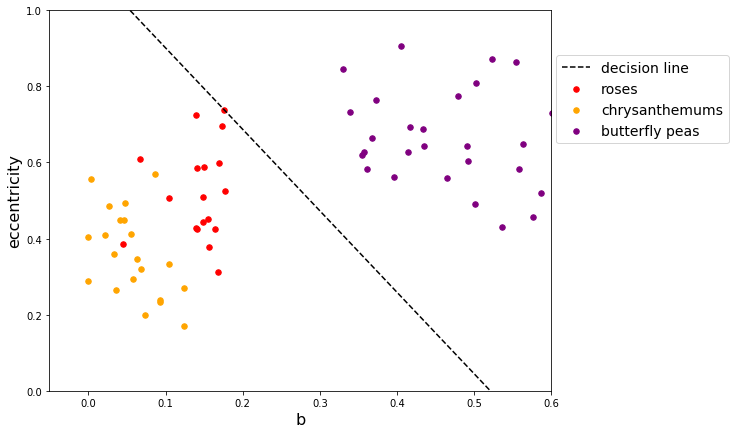

In [11]:
plt.figure(figsize=(9,7))

plt.scatter(roses['b'],roses['eccentricity'],c='red',s=30,label='roses')
plt.scatter(chrysanthemums['b'],chrysanthemums['eccentricity'],c='orange',s=30,label='chrysanthemums')
plt.scatter(butterfly_pea['b'],butterfly_pea['eccentricity'],c='purple',s=30,label='butterfly peas')
# plt.plot(np.linspace(0,1),m2*np.linspace(0,1)+b2,'b--',label = 'decision line 1')
plt.plot(np.linspace(0,1),m1*np.linspace(0,1)+b1,'k--',label = 'decision line')
plt.ylabel('eccentricity',fontsize=16)
plt.xlabel('b',fontsize=16)
plt.legend(loc=(1.01,0.65),fontsize=14)
plt.xlim(right=0.6)
plt.ylim(0,1)

# plt.savefig('evsb_line.png',dpi=300,bbox_inches='tight')
plt.show()